In [1]:
# Import libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_base2 = pd.read_csv('BasisModel_20210829Convergence-test-vist150-75Combined.csv')

## Convergence test

In [3]:
def check_convergence(df, initial_number_visitor, Culture, i, j):
    df_conv = df[(df['Culture'] == Culture) & (df['initial_number_visitor'] == initial_number_visitor)]
    
    for index, row in df_conv.iterrows():
        df_conv.loc[index,'total_evacuation_time'] = df_conv.loc[:index,'total_evacuation_time'].mean()
        
    df_conv.reset_index(inplace=True)
    
    return sns.lineplot(ax=axs[i][j], data=df_conv, x=df_conv.index,y='total_evacuation_time').set_title(Culture)

C:\Users\elvir\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\elvir\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\elvir\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

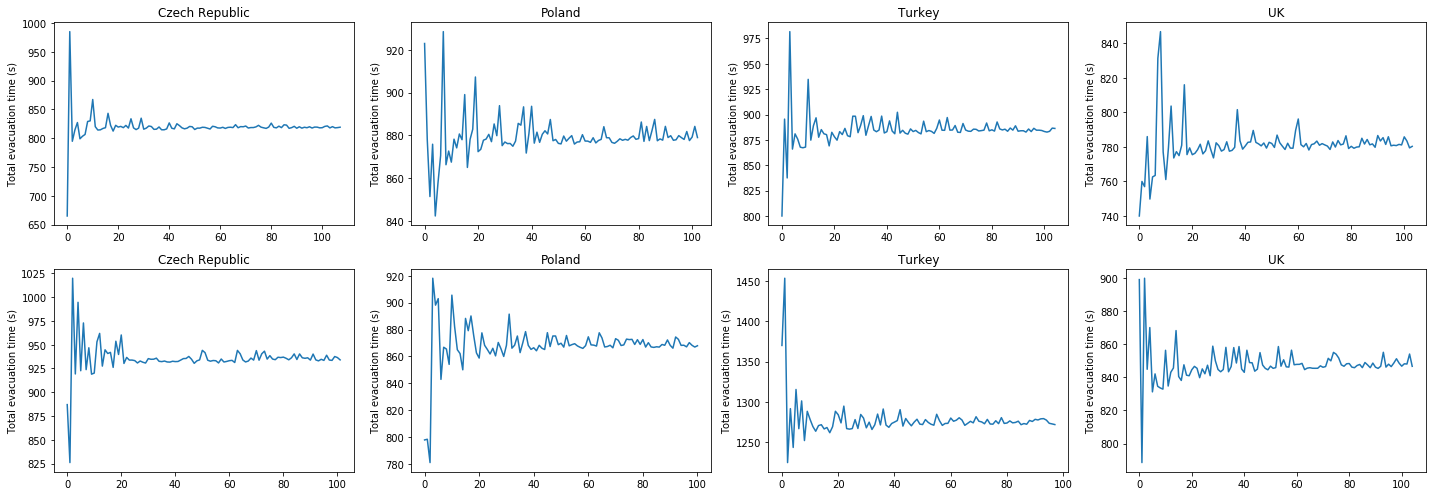

In [4]:
fig, axs = plt.subplots(2, 4, figsize=(20, 7), sharey=False)

check_convergence(df_base2, 75, "Czech Republic", 0, 0)
check_convergence(df_base2, 75, "Poland", 0, 1)
check_convergence(df_base2, 75, "Turkey", 0, 2)
check_convergence(df_base2, 75, "UK", 0, 3)

check_convergence(df_base2, 150, "Czech Republic", 1, 0)
check_convergence(df_base2, 150, "Poland", 1, 1)
check_convergence(df_base2, 150, "Turkey", 1, 2)
check_convergence(df_base2, 150, "UK", 1, 3)

for i, axs in enumerate(axs.flat):

    axs.set_ylabel("Total evacuation time (s)")
plt.tight_layout()
plt.savefig("convergence.png", dpi=300)


# Validation 
## Response time distribution

In [5]:
# Change column names
df_base2.rename(columns={'[run number]': 'Run_number', "Exits-available": "Exits_available","Familiarity-meter": "Familiarity", "initial_number_visitor": "Num_Visitors",
                       "vision-distance": 'Vision_distance', 'Chance-friends-in-building': "Chance_friends_in_building", 'vision-angle': "vision_angle", 
                        'gender-ratio': "gender_ratio", "chance-friends-nearby": "Chance_friends_nearby","Visitors-not-on-place": "Vistors_not_in_place",
                        'initial-number-staff': "Num_staff","[step]": "Step", 'total-evacuation-time': "Total_evacuation_time", '[ response-time ] of visitors': "Response_times_visitors",
                        '[ response-time ] of staff': "Response_times_staff", '[evacuation-time] of visitors': "Evac_times_visitors",
                        '[evacuation-time] of staff': 'Evac_times_staff', "[notif] of staff": "Notification_times_staff",
                        '[notif] of visitors': "Notification_times_visitors",'[response-time-excl-notif] of staff': "Response_times_staff_excNotif",
                        "[response-time-excl-notif] of visitors":"Response_times_visitors_excNotif", '[movement-time] of staff': "Movement_times_staff",
                        'gender-ratio': "gender_ratio", '[movement-time] of visitors':"Movement_times_visitors",'[response-tasks-list] of visitors':"Response_tasks_lists",
                'count staff with [ evacuated-state? =  True ]': "Staff_evacuated", 'count visitors with [ evacuated-state? =  True ]':"Visitors_evacuated"}, inplace=True)

# Only keep useful columns
df_base3= df_base2[['Familiarity', 'Num_Visitors', 'Num_staff',  'Chance_friends_in_building', 'Culture', 'total_evacuation_time', 'Response_times_visitors',
 'Response_times_staff',  'Evac_times_visitors',  'Evac_times_staff',  'Notification_times_staff',  'Notification_times_visitors',  'Response_times_staff_excNotif',
 'Response_times_visitors_excNotif',  'Movement_times_staff',  'Movement_times_visitors',  'Response_tasks_lists',  ]].copy()

# Adjust lists columns; make them useable

Lists_columns= ['Response_times_visitors', 'Response_times_staff', 'Evac_times_visitors',  'Evac_times_staff', 'Notification_times_staff', 'Notification_times_visitors',
               'Response_times_staff_excNotif', 'Response_times_visitors_excNotif',  'Movement_times_staff',  'Movement_times_visitors' ]
for i in Lists_columns:
    df_base3[i]=df_base3[i].str.replace('[', '')
    df_base3[i]=df_base3[i].str.replace("]", "")
    df_base3[i]=df_base3[i].str.split(" ")

#Sort values in lists
for i in Lists_columns:
    df_base3[i]=df_base3[i].apply(lambda x: sorted(x))

# Transform strings to integers
for i in Lists_columns:
    for y in df_base3.index:
        x= df_base3.iloc[y][i]
        xx= list(map(int, x))
        df_base3.at[y,i] = xx
        

In [8]:
# Validation BeSecu Response time distribution # TAKES LONG TIME TO RUN
df_base4=df_base3.loc[df_base3[ "Num_Visitors"]==150]
Response_distr_df=pd.DataFrame(columns=["Culture", "ResponseTime"])

for i in df_base4.index:
    response_time_list= df_base4["Response_times_visitors"][i]
    Culture2=df_base4["Culture"][i]
    for y in response_time_list:
        Response_distr_df=Response_distr_df.append({'Culture': Culture2, 'ResponseTime': y}, ignore_index=True)


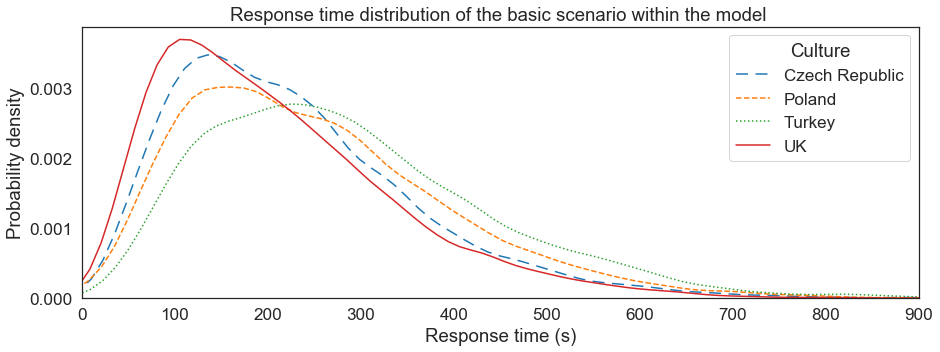

In [9]:
# Response time distribution
Response_distr_df_Czech= Response_distr_df.loc[Response_distr_df["Culture"] == "Czech Republic"]
Response_distr_df_Poland= Response_distr_df.loc[Response_distr_df["Culture"] == "Poland"]
Response_distr_df_Turkey= Response_distr_df.loc[Response_distr_df["Culture"] == "Turkey"]
Response_distr_df_UK= Response_distr_df.loc[Response_distr_df["Culture"] == "UK"]

plt.rcParams["figure.figsize"] = (15,5)
sns.set(font_scale=1.55 )
sns.set_palette("tab10")
sns.set_style("white")
sns.distplot(Response_distr_df_Czech[["ResponseTime"]], hist=False, rug=False, kde_kws={'ls': (0, (8, 5))}, label= "Czech Republic")
sns.distplot(Response_distr_df_Poland[["ResponseTime"]], hist=False, rug=False, kde_kws={'linestyle':'--'}, label = "Poland")
sns.distplot(Response_distr_df_Turkey[["ResponseTime"]], hist=False, rug=False, kde_kws={'linestyle':'dotted'}, label= "Turkey")
sns.distplot(Response_distr_df_UK[["ResponseTime"]], hist=False, rug=False, label= "UK")

plt.legend(title='Culture')
plt.xlim(0, 900)

plt.xlabel("Response time (s)")
plt.ylabel("Probability density")
plt.xlim(0, 900)
plt.title("Response time distribution of the basic scenario within the model ")
plt.savefig("responsetimedistributionmodel.png", dpi=300)
plt.show()


## Evacuated over time

In [14]:
# Do Validation for 100 visitors; similar to besecu
df_base2_100 = pd.read_csv('BasisModel_20210829 Numvist25-100-table.csv')

In [15]:
# Change column names
df_base2_100.rename(columns={'[run number]': 'Run_number', "Exits-available": "Exits_available","Familiarity-meter": "Familiarity", "initial_number_visitor": "Num_Visitors",
                          "initial-number-visitor": "Num_Visitors",    
                       "vision-distance": 'Vision_distance', 'Chance-friends-in-building': "Chance_friends_in_building", 'vision-angle': "vision_angle", 
                        'gender-ratio': "gender_ratio", "chance-friends-nearby": "Chance_friends_nearby","Visitors-not-on-place": "Vistors_not_in_place",
                        'initial-number-staff': "Num_staff","[step]": "Step", 'total-evacuation-time': "Total_evacuation_time", '[ response-time ] of visitors': "Response_times_visitors",
                        '[ response-time ] of staff': "Response_times_staff", '[evacuation-time] of visitors': "Evac_times_visitors",
                        '[evacuation-time] of staff': 'Evac_times_staff', "[notif] of staff": "Notification_times_staff",
                        '[notif] of visitors': "Notification_times_visitors",'[response-time-excl-notif] of staff': "Response_times_staff_excNotif",
                        "[response-time-excl-notif] of visitors":"Response_times_visitors_excNotif", '[movement-time] of staff': "Movement_times_staff",
                        'gender-ratio': "gender_ratio", '[movement-time] of visitors':"Movement_times_visitors",'[response-tasks-list] of visitors':"Response_tasks_lists",
                'count staff with [ evacuated-state? =  True ]': "Staff_evacuated", 'count visitors with [ evacuated-state? =  True ]':"Visitors_evacuated"}, inplace=True)

# Only keep useful columns
df_base3_100= df_base2_100[['Familiarity', 'Num_Visitors', 'Num_staff',  'Chance_friends_in_building', 'Culture', 'Total_evacuation_time', 'Response_times_visitors',
 'Response_times_staff',  'Evac_times_visitors',  'Evac_times_staff',  'Notification_times_staff',  'Notification_times_visitors',  'Response_times_staff_excNotif',
 'Response_times_visitors_excNotif',  'Movement_times_staff',  'Movement_times_visitors',  'Response_tasks_lists',  ]].copy()

# Adjust lists columns; make them useable

Lists_columns= ['Response_times_visitors', 'Response_times_staff', 'Evac_times_visitors',  'Evac_times_staff', 'Notification_times_staff', 'Notification_times_visitors',
               'Response_times_staff_excNotif', 'Response_times_visitors_excNotif',  'Movement_times_staff',  'Movement_times_visitors' ]
for i in Lists_columns:
    df_base3_100[i]=df_base3_100[i].str.replace('[', '')
    df_base3_100[i]=df_base3_100[i].str.replace("]", "")
    df_base3_100[i]=df_base3_100[i].str.split(" ")

#Sort values in lists
for i in Lists_columns:
    df_base3_100[i]=df_base3_100[i].apply(lambda x: sorted(x))

# Transform strings to integers
for i in Lists_columns:
    for y in df_base3_100.index:
        x= df_base3_100.iloc[y][i]
        xx= list(map(int, x))
        df_base3_100.at[y,i] = xx
        
df_base3_100= df_base3_100.loc[df_base3_100 ["Num_Visitors"] == 100]
df_base3_100=df_base3_100.reset_index()

In [17]:
# Add evacuated over time  # TAKES LONG TIME TO RUN
df_base3_100["Evac_over_time"]= " "
Evacuated_over_time_list= []
for y in df_base3_100.index:
    Evacuated_over_time_list = []
    for i in range (1900):
        larger_elements = [element for element in df_base3_100["Evac_times_visitors"][y] if element < i]
        number_of_elements = len(larger_elements)
        Evacuated_over_time_list.append(number_of_elements)
    df_base3_100["Evac_over_time"][y]=Evacuated_over_time_list


C:\Users\elvir\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [18]:
# Make lists of all lists per country
df_base3_100Poland=df_base3_100.loc[df_base3_100 ["Culture"] == "Poland"]
df_base3_100Czech=df_base3_100.loc[df_base3_100 ["Culture"] == "Czech Republic"]
df_base3_100Turkey=df_base3_100.loc[df_base3_100 ["Culture"] == "Turkey"]
df_base3_100UK=df_base3_100.loc[df_base3_100 ["Culture"] == "UK"]

Poland_evac_over_time_full_list= []
for i in df_base3_100Poland.index:
    Poland_evac_over_time_full_list.append(df_base3_100Poland["Evac_over_time"][i])
Czech_evac_over_time_full_list= []
for i in df_base3_100Czech.index:
    Czech_evac_over_time_full_list.append(df_base3_100Czech["Evac_over_time"][i])
Turkey_evac_over_time_full_list= []
for i in df_base3_100Turkey.index:
    Turkey_evac_over_time_full_list.append(df_base3_100Turkey["Evac_over_time"][i])
UK_evac_over_time_full_list= []
for i in df_base3_100UK.index:
    UK_evac_over_time_full_list.append(df_base3_100UK["Evac_over_time"][i])

# Calculate averages of evacuated over time    
Poland_average_evac_over_time = [sum(x) / len(x) for x in zip(*Poland_evac_over_time_full_list)]
Turkey_average_evac_over_time = [sum(x) / len(x) for x in zip(*Turkey_evac_over_time_full_list)]
Czech_average_evac_over_time = [sum(x) / len(x) for x in zip(*Czech_evac_over_time_full_list)]
UK_average_evac_over_time = [sum(x) / len(x) for x in zip(*UK_evac_over_time_full_list)]


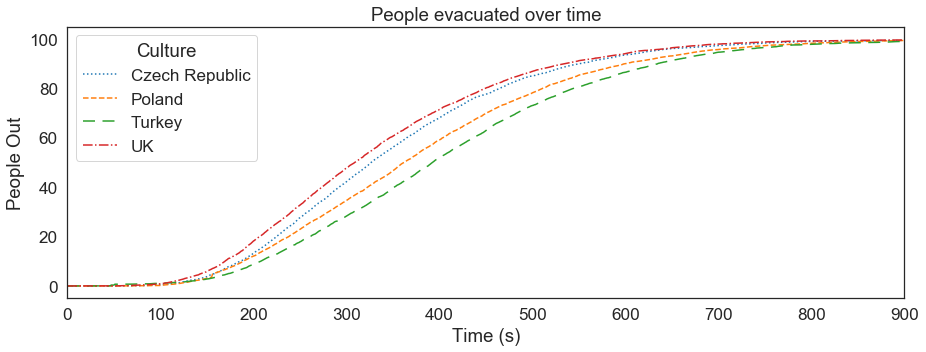

In [19]:
# Average per country
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(range(1900), Czech_average_evac_over_time,'#1f77b4', linestyle='dotted', label = "Czech Republic")
plt.plot(range(1900), Poland_average_evac_over_time, '#ff7f0e', linestyle='dashed', label= "Poland")
plt.plot(range(1900), Turkey_average_evac_over_time, '#2ca02c', ls=(0, (8, 5)), label= "Turkey")
plt.plot(range(1900), UK_average_evac_over_time, '#d62728' , linestyle='dashdot', label= "UK")
plt.legend(title='Culture')
plt.xlabel("Time (s)")
plt.ylabel("People Out")
plt.xlim(0, 900)
plt.title("People evacuated over time")
plt.savefig("peopleveacvalidation.png", dpi=300)
plt.show()
